In [1]:
#2d的直方圖練習
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font = fm.FontProperties(fname="fonts/SourceHanSansCNRegular.otf")

n = 10000
x = np.random.standard_normal(n)                                    #產生1萬個,均值0，標準差1的隨機數
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)              #產生1萬個y隨機數

print(x)
print(y)

[ 0.50642465 -0.44364734  1.66708966 ...  0.86430885 -1.19769506
 -1.46970507]
[12.03051541  1.98882423  0.02100031 ...  7.1591919  -5.75650905
 -1.66388495]


In [2]:
# np.linspace(-4, 4, 42) linspace函式在 -4 到 4 之間產生等距的42個數字
# 譬如 np.linspace(0,10,5) print -> [ 0. 2.5 5. 7.5 10.] 五個數字
xedges, yedges = np.linspace(-4, 4, 42), np.linspace(-25, 25, 42)  
print(xedges)
print(yedges)

[-4.         -3.80487805 -3.6097561  -3.41463415 -3.2195122  -3.02439024
 -2.82926829 -2.63414634 -2.43902439 -2.24390244 -2.04878049 -1.85365854
 -1.65853659 -1.46341463 -1.26829268 -1.07317073 -0.87804878 -0.68292683
 -0.48780488 -0.29268293 -0.09756098  0.09756098  0.29268293  0.48780488
  0.68292683  0.87804878  1.07317073  1.26829268  1.46341463  1.65853659
  1.85365854  2.04878049  2.24390244  2.43902439  2.63414634  2.82926829
  3.02439024  3.2195122   3.41463415  3.6097561   3.80487805  4.        ]
[-25.         -23.7804878  -22.56097561 -21.34146341 -20.12195122
 -18.90243902 -17.68292683 -16.46341463 -15.24390244 -14.02439024
 -12.80487805 -11.58536585 -10.36585366  -9.14634146  -7.92682927
  -6.70731707  -5.48780488  -4.26829268  -3.04878049  -1.82926829
  -0.6097561    0.6097561    1.82926829   3.04878049   4.26829268
   5.48780488   6.70731707   7.92682927   9.14634146  10.36585366
  11.58536585  12.80487805  14.02439024  15.24390244  16.46341463
  17.68292683  18.90243902

In [3]:
# np.histogram2d(x, y, (xedges, yedges)) 產生2d直方圖
# x,y 一維中的數據，上面x,y各有一萬個
# bin = (xedges, yedges) 指定直方圖的邊界
hist, xedges, yedges = np.histogram2d(x, y, (xedges, yedges))

In [4]:
# np.clip(a,a_min,a_max) 接受一組數列 a ,限制範圍在 a_min,a_max
# 譬如   
a = np.array([1, 2, 3, 4, 5])
a_clipped = np.clip(a, 2, 4) 
print(a_clipped) #====> [ 2 2 3 4 4 ] 1比2小變成1，5比4大變成4

[2 2 3 4 4]


In [5]:
# np.digitize(x,xedges)
# 譬如    
x_ex = np.array([1, 3, 5, 2, 4])
xedges_ex = np.array([2, 4])
indices = np.digitize(x_ex, xedges_ex)
print(indices) #=====> [0,1,2,1,2]
# 因為 xedges 有兩個數字，因此三個箱子
#       箱子0   < 第一個數字(2)
#                  第一個數字(2)  <=   箱子1   < 第二個數字(4)
#                                            <=  第二個數字(4)      箱子2

[0 1 2 1 2]


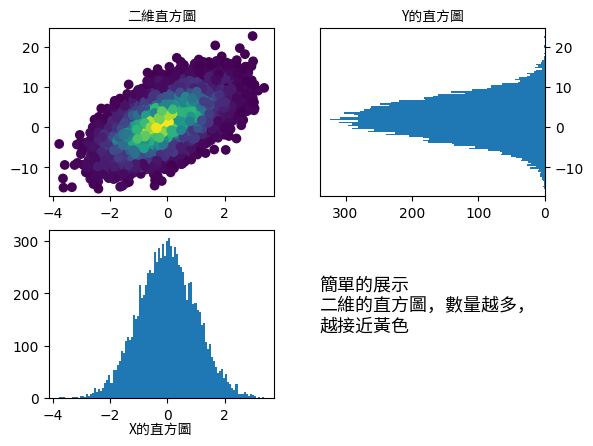

In [6]:
#所以np.digitize(x,xedges) 將一萬個標準差1的數字分到 -4 ~ 4 之間 42個範圍 並將範圍限制在 0 ~ 42 之間
xidx = np.clip(np.digitize(x, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(y, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]      #二維數值

# 在x,y一維空間，帶入數量c的二維數值
plt.subplot(2,2,1)
plt.title("二維直方圖",fontproperties = font)
plt.scatter(x, y,c=c)  

# y 數量一維圖
plt.subplot(2,2,2)    
plt.title("Y的直方圖",fontproperties = font)
# 將 x 顛倒
plt.gca().invert_xaxis()
# 將y標籤移到右邊
plt.tick_params(axis='y', labelleft=False, labelright=True, left=False, right=True)
# 更改水平方向，以實現 90 度旋轉
plt.hist(y,orientation= "horizontal",bins=100) 

# x數量一維圖
plt.subplot(2,2,3)
#plt.title("X的直方圖",fontproperties = font)   #原本的title只能顯示在上面，所以用suptitle
plt.suptitle("X的直方圖",fontproperties = font,x=0.3,y=0.06)
plt.hist(x,bins = 100)

#簡單的介紹圖片
plt.subplot(2,2,4)
plt.gca().axis('off')   #關閉軸座標
plt.text(x=-0,y=0.4,fontproperties = font,fontsize = 13,
         s = "簡單的展示\n二維的直方圖，數量越多，\n越接近黃色")

plt.show()